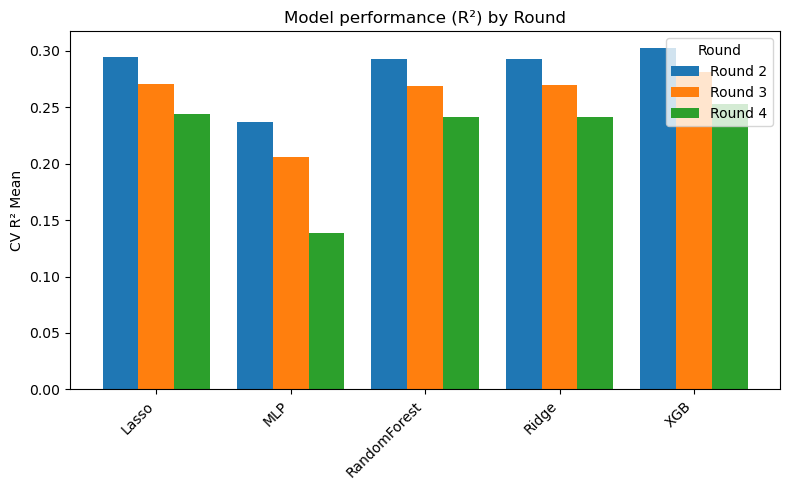

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1) Read each CSV and tag with the round
dfs = []
for rnd in [2,3,4]:
    df = pd.read_csv(f'/rds/general/user/hsl121/home/hda_project/hrqol/results/gad7_round{rnd}/gad7_round{rnd}_results.csv') 
    df['Round'] = f'Round {rnd}'
    dfs.append(df)

# 2) Concatenate
all_df = pd.concat(dfs, ignore_index=True)

# 3) Pivot so that rows are models, columns are R² means per round
pivot = all_df.pivot(index='Model', columns='Round', values='r2_mean')

# 4) Plot grouped bars
fig, ax = plt.subplots(figsize=(8,5))
models = pivot.index
n_models = len(models)
rounds = pivot.columns.tolist()
x = np.arange(n_models)                
width = 0.8 / len(rounds)                

for i, rnd in enumerate(rounds):
    ax.bar(x + i*width, pivot[rnd], width, label=rnd)

ax.set_xticks(x + width*(len(rounds)-1)/2)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_ylabel('CV R² Mean')
ax.set_title('Model performance (R²) by Round')
ax.legend(title='Round')
plt.tight_layout()
plt.show()


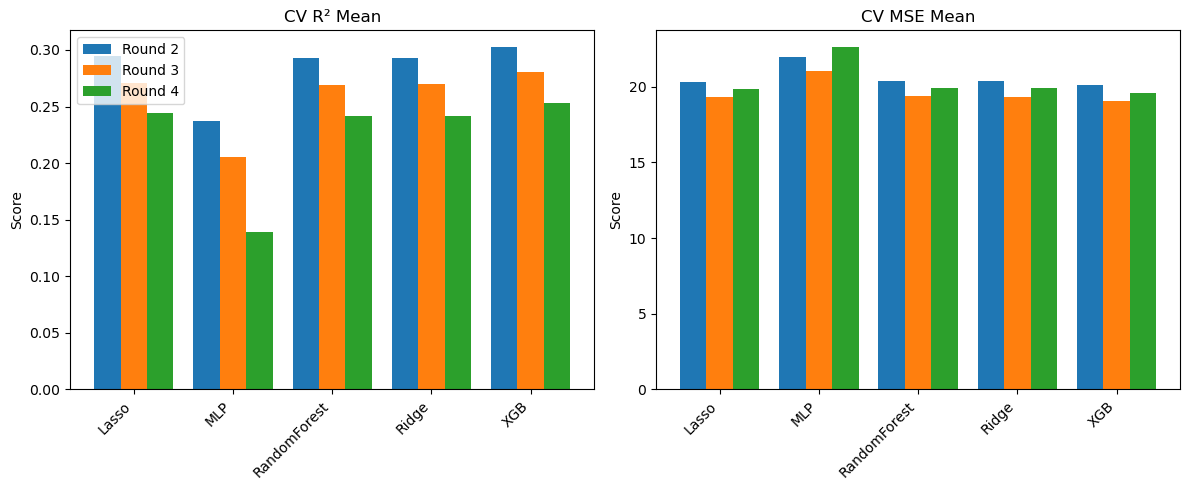

In [3]:
fig, axes = plt.subplots(1,2,figsize=(12,5),sharex=True)

# R²
pivot_r2 = all_df.pivot(index='Model', columns='Round', values='r2_mean')
for i, rnd in enumerate(rounds):
    axes[0].bar(x + i*width, pivot_r2[rnd], width, label=rnd)
axes[0].set_title('CV R² Mean')
axes[0].legend()

# MSE
pivot_mse = all_df.pivot(index='Model', columns='Round', values='mse_mean')
for i, rnd in enumerate(rounds):
    axes[1].bar(x + i*width, pivot_mse[rnd], width, label=rnd)
axes[1].set_title('CV MSE Mean')

for ax in axes:
    ax.set_xticks(x + width*(len(rounds)-1)/2)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.set_ylabel('Score')

plt.tight_layout()
plt.show()
